In [1]:
import os
os.chdir("..\..")
import torch
import numpy as np
from data.gp_dataloader import GPDataGenerator
from models.convcnp import ConvCNP, SimpleConv, UNet, train_1d
from utils import plot_np_results
from sklearn.gaussian_process.kernels import Matern, RBF, WhiteKernel, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

# Set the random seed for reproducibility
torch.manual_seed(1)
np.random.seed(1)

Using device: cpu


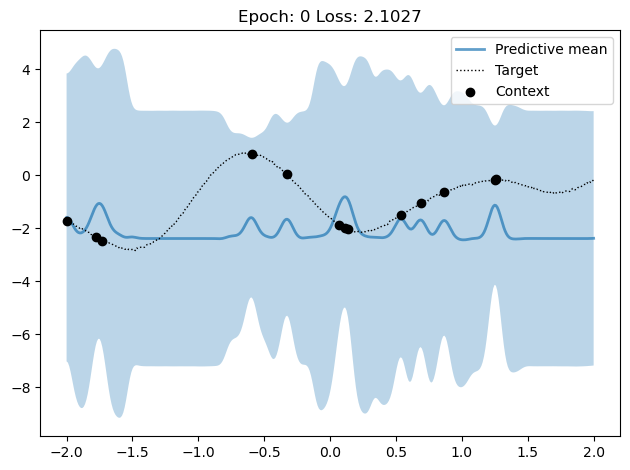

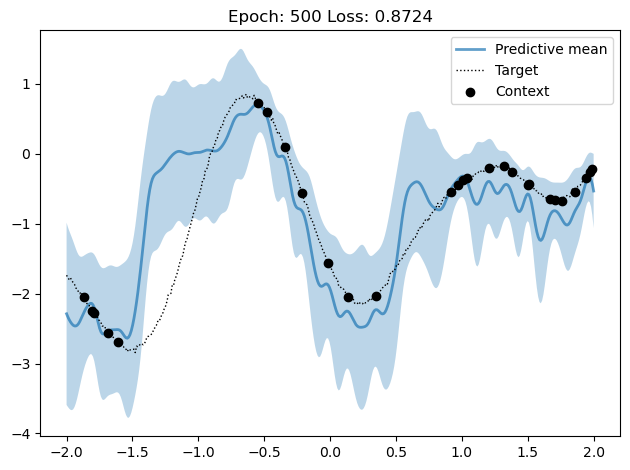

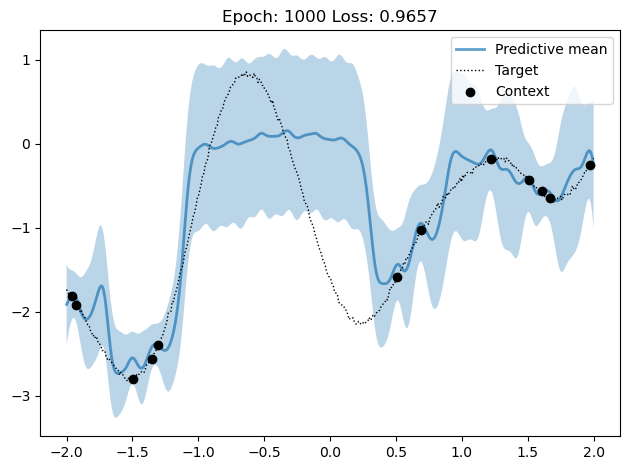

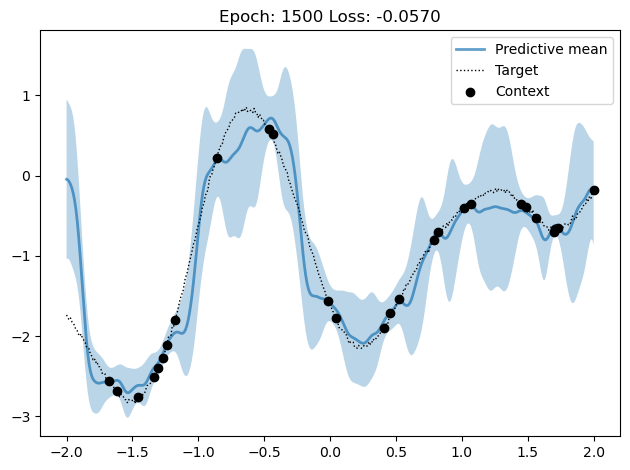

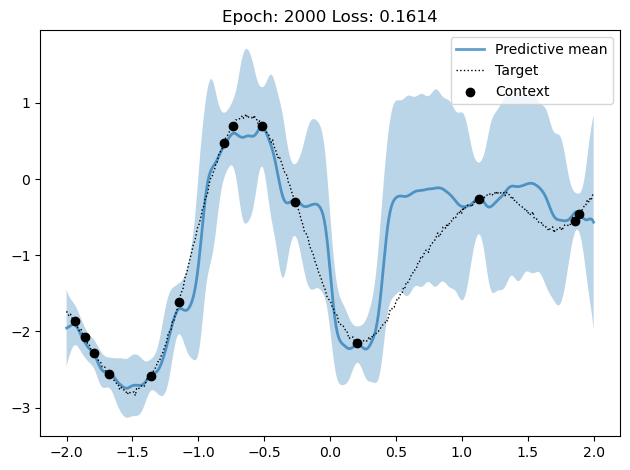

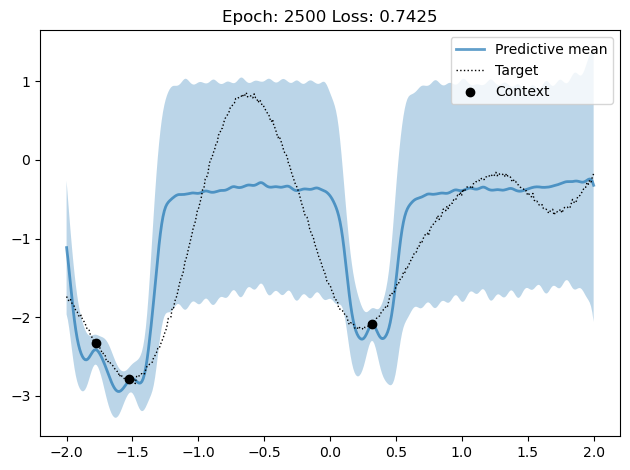

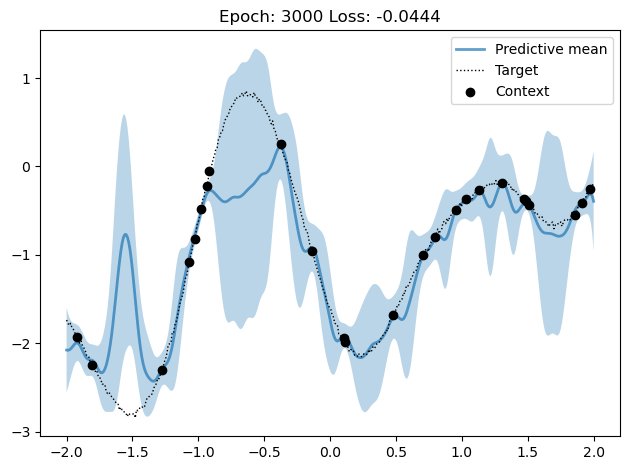

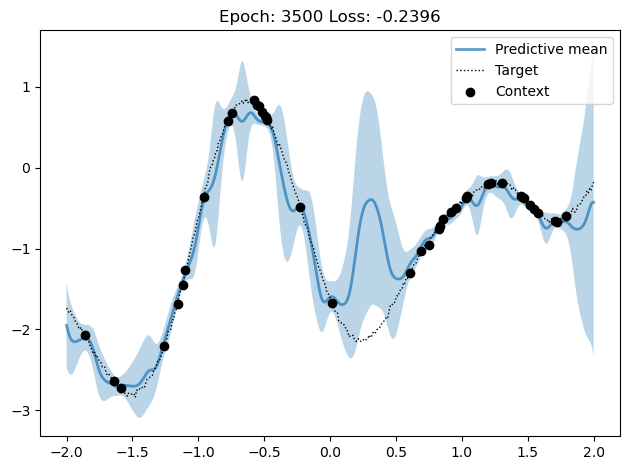

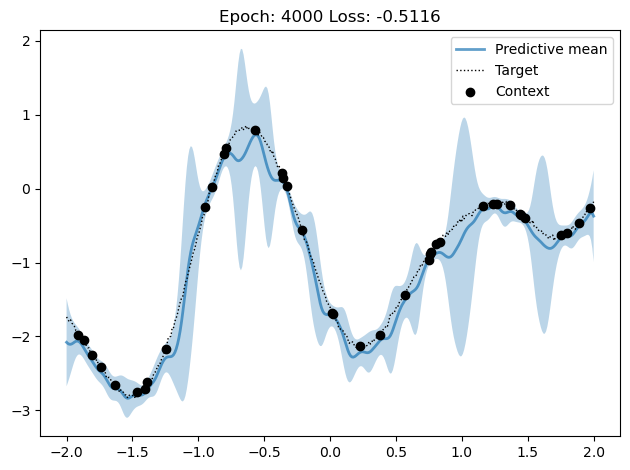

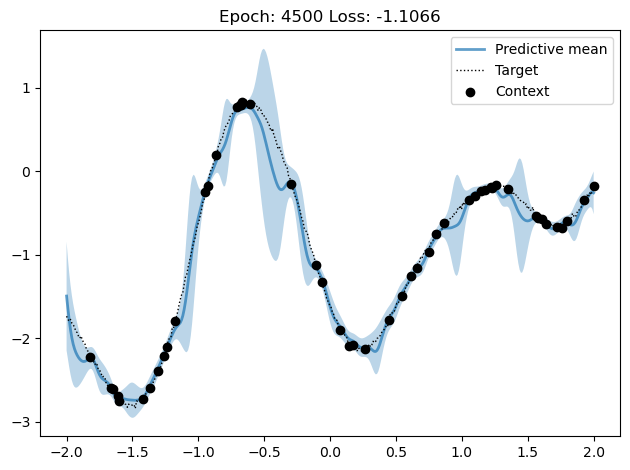

In [3]:
# Test with RBF kernel
train_gen = GPDataGenerator(randomize_kernel_params=False, max_n_context=50)
test_gen = GPDataGenerator(randomize_kernel_params=False, testing=True, max_n_context=50, batch_size=1)

model = ConvCNP(in_channels=1, out_channels=1, learn_length_scale=True, points_per_unit=64, rho=UNet())
train_1d(model, epochs=5000, train_gen=train_gen, test_gen=test_gen)

Using device: cpu


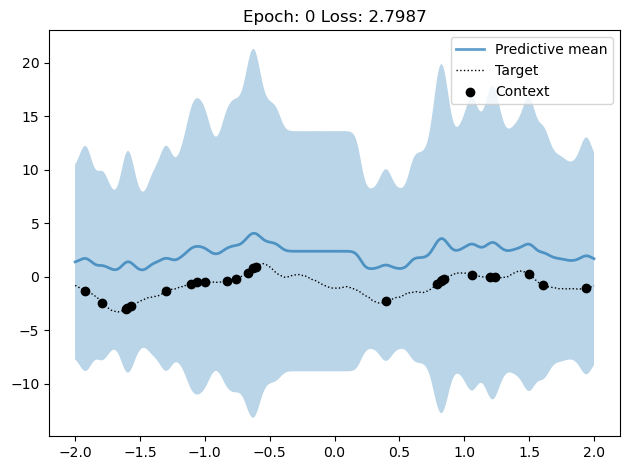

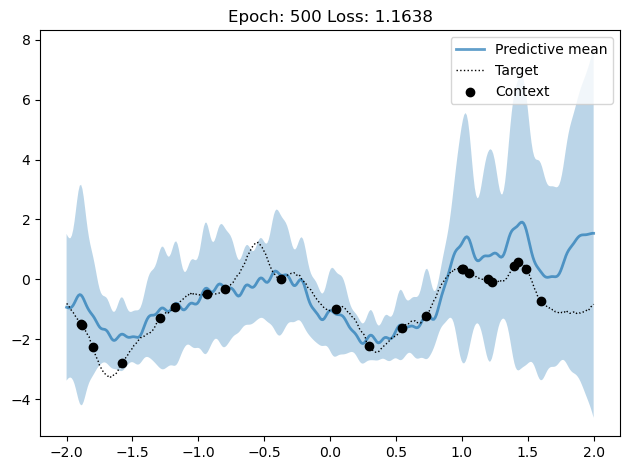

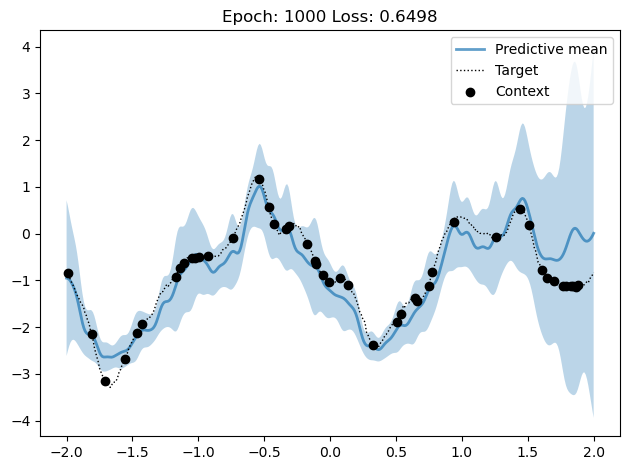

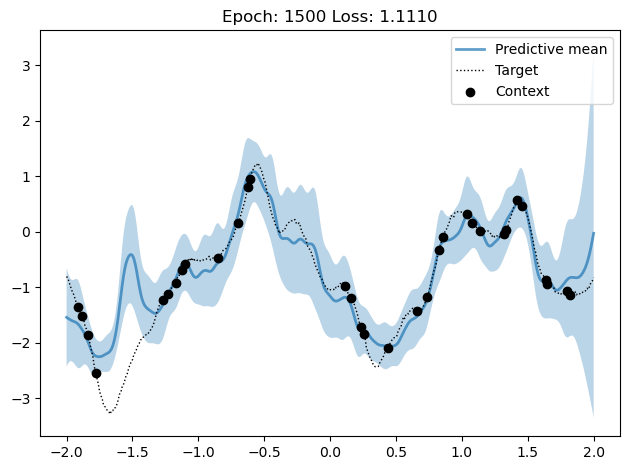

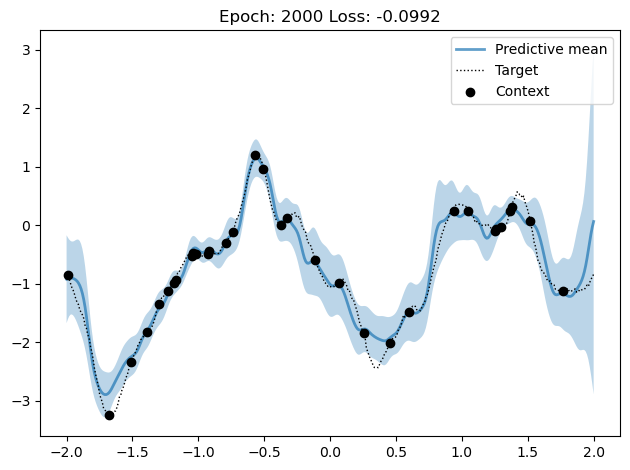

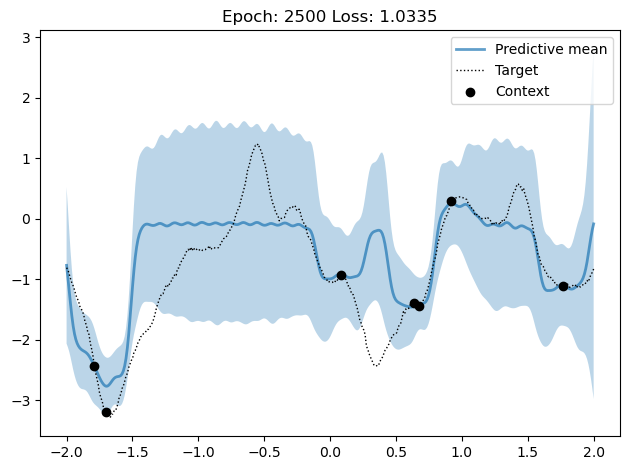

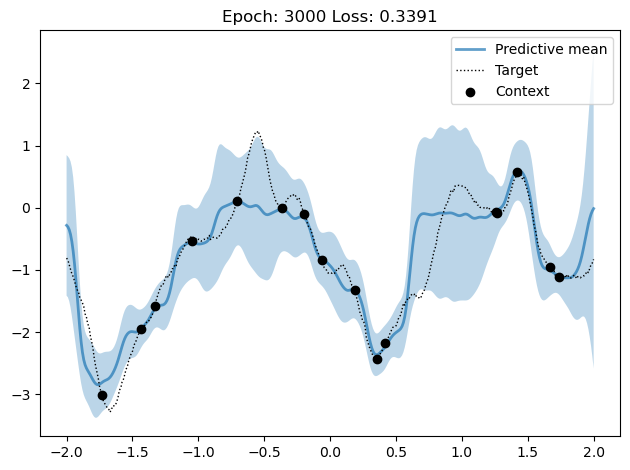

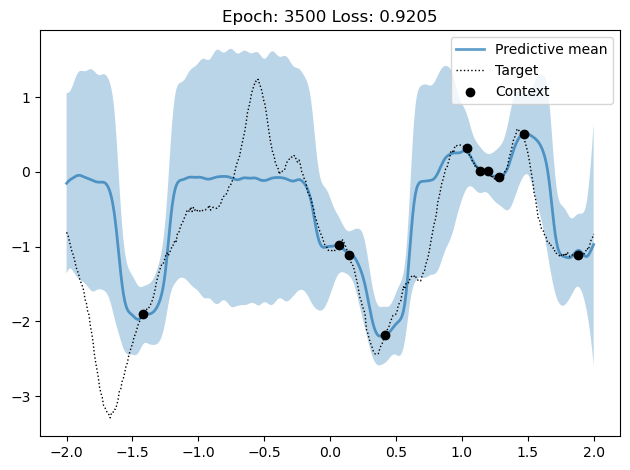

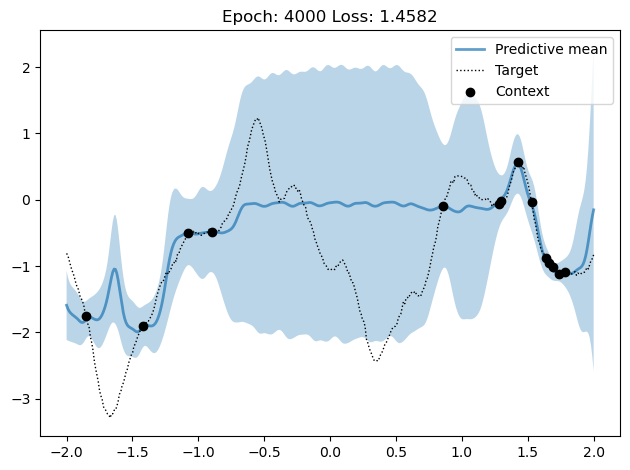

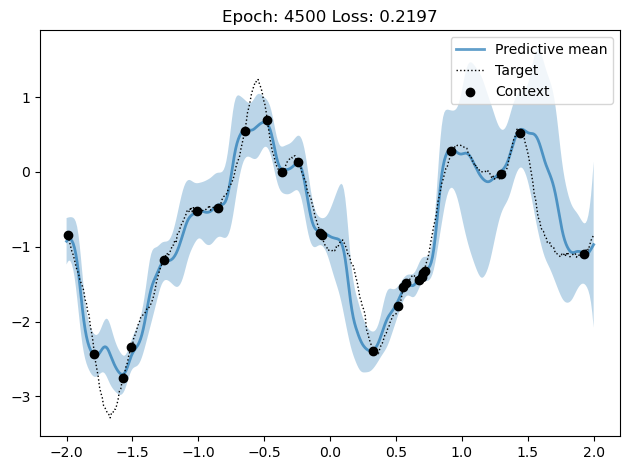

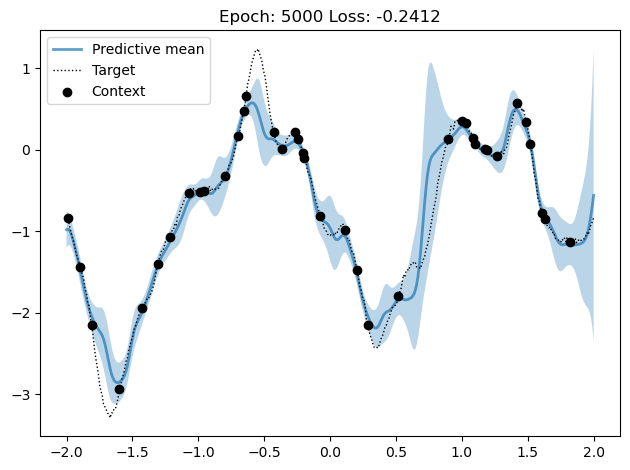

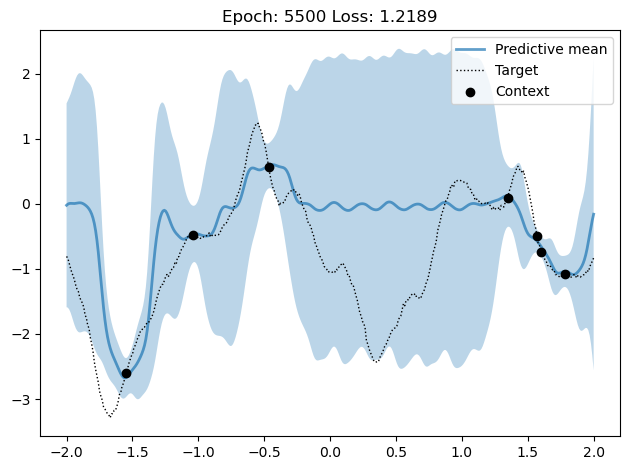

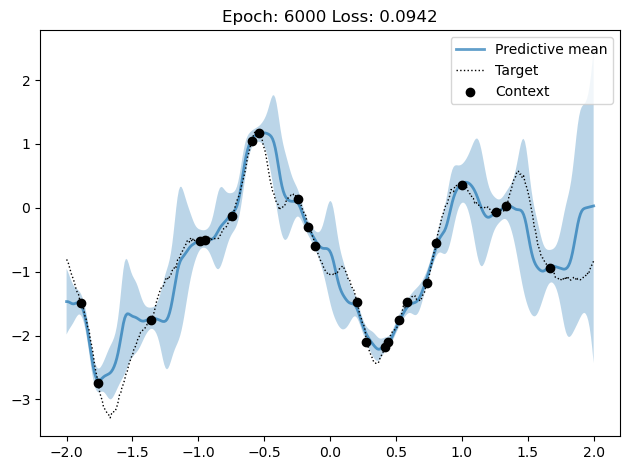

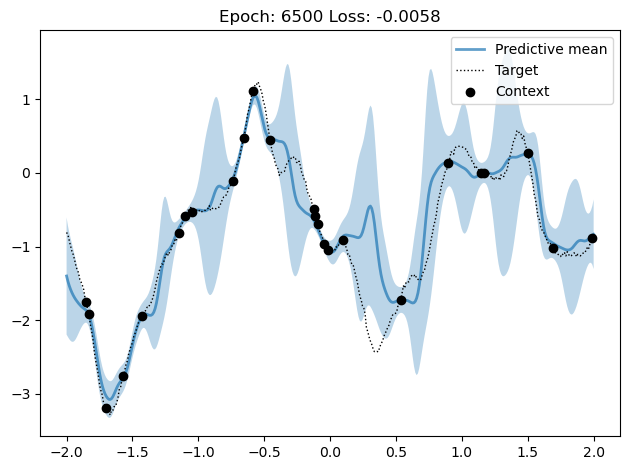

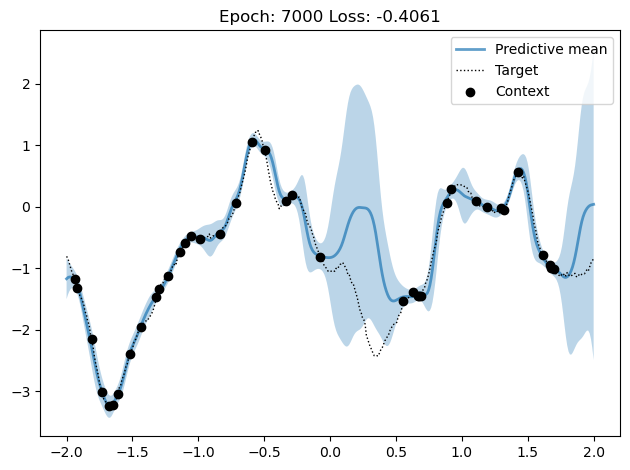

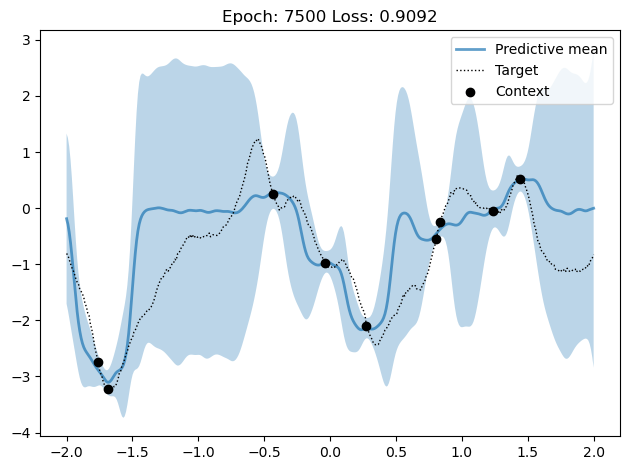

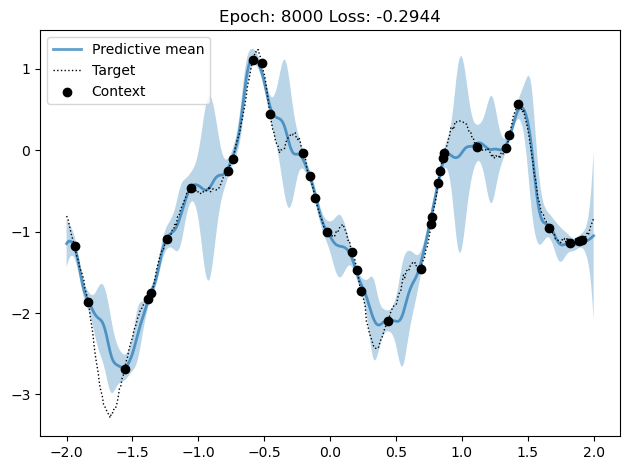

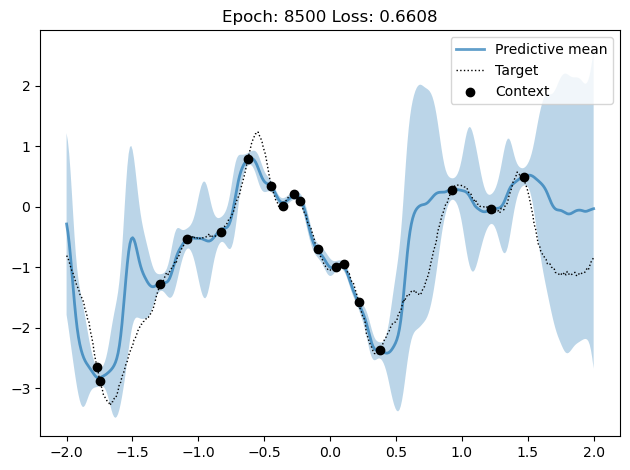

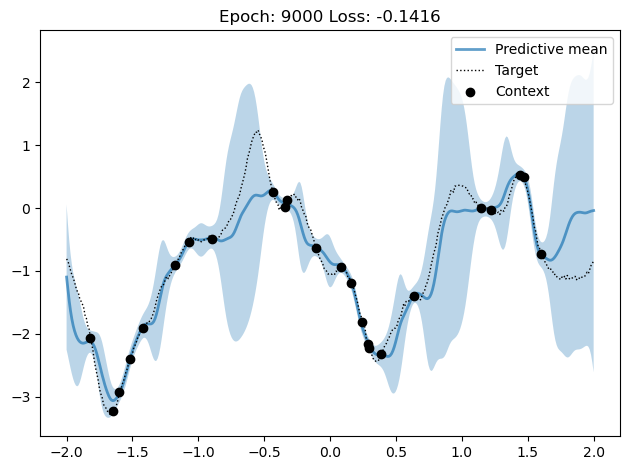

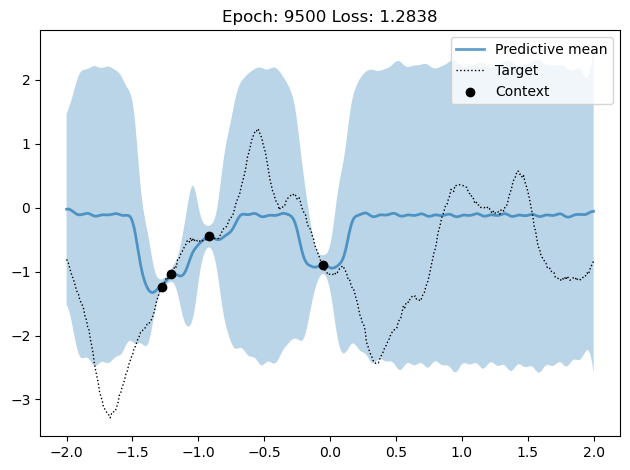

In [3]:
# Test with Matern 5/2 kernel
Matern52 = Matern(length_scale=0.25, nu=2.5)+WhiteKernel(2e-2**2, "fixed")
train_gen_matern52 = GPDataGenerator(kernel=Matern52,randomize_kernel_params=False, max_n_context=50)
test_gen_matern52 = GPDataGenerator(kernel=Matern52,randomize_kernel_params=False, testing=True, max_n_context=50, batch_size=1)

model_matern52 = ConvCNP(in_channels=1, out_channels=1, learn_length_scale=True, points_per_unit=64, rho=UNet())
train_1d(model_matern52, epochs=10000, train_gen=train_gen_matern52, test_gen=test_gen_matern52)
